# Importing Libraries

In [81]:
import numpy as nd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [82]:
train_tweets_csv = pd.read_csv('tweets.csv')
test_tweets_csv = pd.read_csv('test_tweets.csv')

In [87]:
train_tweets = train_tweets_csv[['tweet_text', 'sentiment', 'typeofsentiment']]
test_tweets = test_tweets_csv[['tweet_text']]

# Data Analysis

7.0
6.0


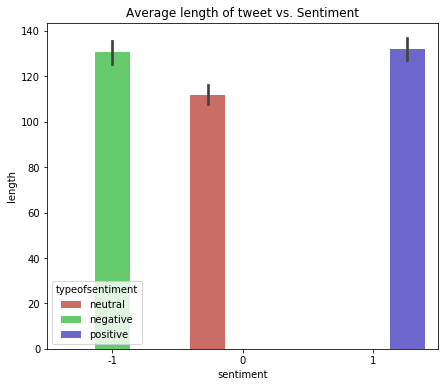

In [130]:
train_tweets['length'] = train_tweets['tweet_text'].apply(len)
temp = train_tweets['typeofsentiment']

fig1 = sns.barplot(x = 'sentiment', y = 'length', hue = temp, data = train_tweets, palette = 'hls')
plot_size2 = plt.rcParams["figure.figsize"] 
print(plot_size2[0]) 
print(plot_size2[1])

plot_size2[0] = 7
plot_size2[1] = 6
plt.rcParams["figure.figsize"] = plot_size2 

plt.title("Average length of tweet vs. Sentiment")
plt.show()
plot = fig1.get_figure()
plot.savefig('./tweet-dashboard/src/assets/Bargraph.png')

In [123]:
train_tweets.head()

,tweet_text,sentiment,typeofsentiment,length
0,"['see', 'lot']",0,neutral,14
1,"['RT', 'PMDShitpost', 'Gates', 'danganronpa', ...",0,neutral,62
2,"['RT', 'let', 'get', 'right', 'BJP', 'MPs', 'p...",-1,negative,118
3,"['RT', 'long', 'list', 'Putin', 'would', 'neve...",0,neutral,117
4,"['RT', 'MesMitch', 'Starting', 'President', 'T...",-1,negative,116


6.0
6.0


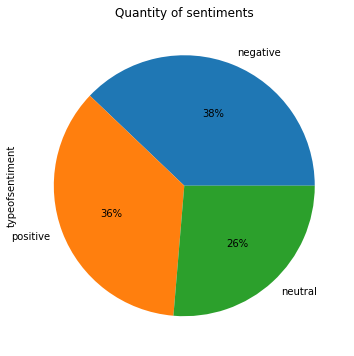

In [125]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 7
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
plt.title("Quantity of sentiments")
fig2 = train_tweets['typeofsentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plot2 = fig2.get_figure()
plot2.savefig('./tweet-dashboard/src/assets/Piechart.png')

# Model Selection & Machine Learning

In [97]:
X = train_tweets['tweet_text']
print(X)
y = train_tweets['sentiment']

0                                         ['see', 'lot']
1      ['RT', 'PMDShitpost', 'Gates', 'danganronpa', ...
2      ['RT', 'let', 'get', 'right', 'BJP', 'MPs', 'p...
3      ['RT', 'long', 'list', 'Putin', 'would', 'neve...
4      ['RT', 'MesMitch', 'Starting', 'President', 'T...
                             ...                        
956    ['RT', 'forwardarc', 'Let', 'try', 'follow', '...
957    ['RT', 'funder', 'Trump', 'stop', 'impeachment...
958    ['LegendaryEnergy', 'vote', 'Donald', 'Trump',...
959    ['RT', 'MollyJongFast', 'favorite', 'Republica...
960    ['RT', 'TheDemCoalition', 'MoscowMitch', 'McCo...
Name: tweet_text, Length: 961, dtype: object


In [98]:
test = test_tweets[['tweet_text']]

## Using Support Vector Machine:
### Training

In [99]:
tw_train, tw_test, label_train, label_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [100]:
pipe = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(
                    loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None
                ))
])

pipe.fit(tw_train, label_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

### Prediction

In [101]:
svm_predictions = pipe.predict(tw_test)
classification_result = classification_report(svm_predictions,label_test)
accuracy = accuracy_score(label_test, svm_predictions)

confusion_matrix(label_test, nb_predictions)

array([[65,  0, 21],
       [15, 21, 17],
       [10,  0, 44]])

In [102]:
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

          -1       0.71      0.79      0.75        77
           0       0.64      0.72      0.68        47
           1       0.76      0.59      0.67        69

   micro avg       0.70      0.70      0.70       193
   macro avg       0.70      0.70      0.70       193
weighted avg       0.71      0.70      0.70       193

0.7046632124352331


## Using Naive Bayes classifier:
### Training

In [103]:
print(test_tweets)

tweet_text
0    ['RT', 'CNN', 'Former', 'first', 'lady', 'Mich...
1    ['RT', 'TrinityMustache', 'Let', 'clear', 'Ber...
2    ['RT', 'justinamash', 'Senators', 'shall', 'Oa...
3    ['RT', 'JohnTrumpFanKJV', 'Lord', 'every', 'ti...
4    ['RT', 'ChuckCallesto', 'DISGUSTING', 'Joy', '...
..                                                 ...
944  ['RT', 'Rep', 'Max', 'Rose', 'moderate', 'Demo...
945  ['RT', 'Richard', 'Nixon', 'impeach', 'spy', '...
946  ['RT', 'CANCEL_SAM', 'time', 'call', 'accusati...
947  ['Judge', 'decision', 'may', 'shine', 'light',...
948  ['RT', 'BillKristol', 'Senators', 'swear', 'oa...

[949 rows x 1 columns]


In [104]:
pipe2 = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB(alpha=1.1))
])

pipe2.fit(tw_train, label_train)

Pipeline(memory=None,
     steps=[('vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.1, class_prior=None, fit_prior=True))])

### Prediction

In [105]:
nb_predictions = pipe2.predict(tw_test)

classification_result = classification_report(nb_predictions,label_test)
accuracy = accuracy_score(label_test, nb_predictions)
confusion_matrix(label_test, nb_predictions)

array([[65,  0, 21],
       [15, 21, 17],
       [10,  0, 44]])

In [106]:
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

          -1       0.76      0.72      0.74        90
           0       0.40      1.00      0.57        21
           1       0.81      0.54      0.65        82

   micro avg       0.67      0.67      0.67       193
   macro avg       0.66      0.75      0.65       193
weighted avg       0.74      0.67      0.68       193

0.6735751295336787
